# 3. Data Wrangling <a id='3_Data_wrangling'></a>

## 3.1 Contents<a id='3.1_Contents'></a>

* [3. Data Wrangling](#3_Data_wrangling)
    * [3.1 Contents](#3.1_Contents)
    * [3.2 Introduction](#3.2_Introduction)
    * [3.3 Imports](#3.3_Imports)
        * [3.3.1 Import packages](#3.3.1_import_packages)
        * [3.3.2 Import Data and obtain summary statistics](#3.3.2_import_data)
    * [3.4 Explore data](#3.4_explore_data)
        * [3.4.1 Top Countries by ladder score](#3.4.1_top_ladder)
        * [3.4.2 Top Countries by GDP](#3.4.2_top_gdp)
        * [3.4.3 Top Countries by Social Support](#3.4.3_top_social)
        * [3.4.4 Top Countries by Life Expectancy](#3.4.4_top_life)
        * [3.4.5 Top Countries by Freedom](#3.4.5_top_freedom)
        * [3.4.6 Top Countries by Generosity](#3.4.6_top_generosity)
        * [3.4.7 Top Countries by Perception of Corruption](#3.4.7_top_corruption)
        * [3.4.8 Top Countries by Income Inequality](#3.4.8_top_gini)
        * [3.4.9 Top Countries by Income per capita](#3.4.9_top_income)
        * [3.4.10 Top Countries by Fertility](#3.4.10_top_fertility)
        * [3.4.11 Top Countries by Child Mortality](#3.4.11_top_childmort)
        * [3.4.12 Top Countries by Labor Participation](#3.4.12_top_labor)
    * [3.5 Variable Distribution vs Target variable](#3.5_distribution_target)
    * [3.6 Histograms for continous variables](#3.6_histograms)
    * [3.7 Interactions between all variables](#3.7_interactions)
    
    
        


        

## Introduction  <a id='3.2_Introduction'></a>

After we finished with wrangling the data we consolidated information from 5 different datasets from Gapminder to the World Happiness dataset. There are 14 columns and 140 rows from this data set. From our initial inspection, there were no missing datapoints and the 2 countries (Congo(Brazzaville and Palestinian Territories) had to be amended in the gapminder data set in order to join with the world happiness dataset. The data is currently in a tidy format.

Next we need to look at:

* 1. The quality of the data, profile of the data 
* 2. The Profile of the data
* 3. Understand each individual variable in the dataset
* 4. Look at the relationship of each variable with the target variable(Happiness Score)
* 5. Look at the interactions between variables
* 6. Look at the data across multiple dimensions


## 3.3. Imports <a id=3.3_Imports></a>

### 3.3.1 Import packages <a id='3.3.1_import_packages'></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 3.3.2 Import data and obtain summary statistics <a id='3.3.2_import_data'></a>

In [74]:
# import data wrangled dataset from previous step.

df = pd.read_csv('whr2021_clean_v5.csv')
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility,child_mortality,labor_ppt_25-54
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,27.1,43500.0,1.79,1.52,86.2
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,28.2,49500.0,1.78,3.85,87.2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,32.3,59300.0,1.56,3.81,90.9
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,27.8,47800.0,1.89,1.85,90.9
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,28.2,51800.0,1.76,3.42,87.8


In [75]:
# obtain summary statistics from dataset

df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility,child_mortality,labor_ppt_25-54
count,140.000000,140.000000,140.000000,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.526464,9.415457,0.814650,65.04485,0.791314,-0.017414,0.726743,38.032857,20392.242857,2.537286,23.774929,80.698571
std,1.094085,1.169013,0.116501,6.59677,0.114759,0.151638,0.180458,7.673063,19374.211059,1.181295,25.405694,10.099968
min,2.523000,6.635000,0.463000,48.47800,0.382000,-0.288000,0.082000,25.000000,613.000000,1.230000,1.520000,47.400000
25%,4.833000,8.521000,0.749000,59.92200,0.717750,-0.131500,0.671500,32.550000,4707.500000,1.685000,4.965000,76.375000
50%,5.505500,9.573000,0.832000,66.65150,0.806500,-0.039500,0.784000,36.600000,14200.000000,1.990000,13.100000,82.900000
75%,6.231000,10.391750,0.906500,69.60775,0.877500,0.077500,0.844250,42.725000,31625.000000,3.140000,35.875000,87.925000
max,7.842000,11.647000,0.983000,76.95300,0.970000,0.542000,0.939000,63.000000,95800.000000,6.930000,112.000000,95.800000


In [76]:
# get a count and distribution of the categorical variable Regional indicator

pd.concat([df['Regional indicator'].value_counts(), df['Regional indicator'].value_counts()/len(df) * 100], axis=1)

,Regional indicator,Regional indicator
Sub-Saharan Africa,34,24.285714
Western Europe,20,14.285714
Latin America and Caribbean,20,14.285714
Middle East and North Africa,17,12.142857
Central and Eastern Europe,15,10.714286
Commonwealth of Independent States,11,7.857143
Southeast Asia,8,5.714286
South Asia,7,5.000000
North America and ANZ,4,2.857143
East Asia,4,2.857143


In [77]:
# check dtypes and column, row count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  income_per_capita             140 non-null    float64
 11  fertility                     140 non-null    float64
 12  child_mortality               140 non-null    float64
 13  labor

In [78]:
# calculate Region based statistics for continuious variables

df.groupby('Regional indicator').describe().T

Regional indicator     Central and Eastern Europe  \
Ladder score    count                   15.000000   
                mean                     5.935867   
                std                      0.506262   
                min                      5.101000   
                25%                      5.697000   
...                                           ...   
labor_ppt_25-54 min                     71.700000   
                25%                     80.800000   
                50%                     83.000000   
                75%                     88.550000   
                max                     91.000000   

Regional indicator     Commonwealth of Independent States  East Asia  \
Ladder score    count                           11.000000   4.000000   
                mean                             5.441818   5.700250   
                std                              0.450300   0.264244   
                min                              4.875000   5.339000   
                25%                              5.118500   5.592500   
...                                                   ...        ...   
labor_ppt_25-54 min                             55.200000  77.700000   
                25%                             78.400000  78.825000   
                50%                             81.600000  82.850000   
                75%                             89.050000  86.600000   
                max                             94.400000  86.900000   

Regional indicator     Latin America and Caribbean  \
Ladder score    count                    20.000000   
                mean                      5.908050   
                std                       0.693467   
                min                       3.615000   
                25%                       5.752000   
...                                            ...   
labor_ppt_25-54 min                      72.000000   
                25%                      79.125000   
                50%                      81.500000   
                75%                      84.025000   
                max                      88.600000   

Regional indicator     Middle East and North Africa  North America and ANZ  \
Ladder score    count                     17.000000               4.000000   
                mean                       5.219765               7.128500   
                std                        0.999259               0.138057   
                min                        3.658000               6.951000   
                25%                        4.584000               7.065000   
...                                             ...                    ...   
labor_ppt_25-54 min                       47.400000              81.000000   
                25%                       59.900000              83.325000   
                50%                       62.200000              85.450000   
                75%                       70.600000              86.850000   
                max                       85.500000              87.000000   

Regional indicator     South Asia  Southeast Asia  Sub-Saharan Africa  \
Ladder score    count    7.000000         8.00000           34.000000   
                mean     4.441857         5.45475            4.476088   
                std      0.993462         0.63021            0.658421   
                min      2.523000         4.42600            3.145000   
                25%      4.072000         5.21625            4.081500   
...                           ...             ...                 ...   
labor_ppt_25-54 min     60.100000        75.70000           60.500000   
                25%     65.300000        76.80000           76.600000   
                50%     67.400000        85.55000           84.000000   
                75%     72.650000        89.45000           90.250000   
                max     92.300000        93.50000           95.800000   

Regional indicator     Western Euro

In [79]:
df.groupby('Regional indicator')['Logged GDP per capita'].describe().T

Regional indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
count,15.000000,11.000000,4.000000,20.000000,17.000000,4.000000,7.000000,8.000000,34.000000,20.00000
mean,10.144467,9.480364,10.083750,9.370000,9.666118,10.809500,8.682571,9.480750,8.032088,10.83505
std,0.358500,0.590364,0.641871,0.650216,0.927938,0.157701,0.744668,1.019934,0.803257,0.30756
min,9.520000,8.091000,9.400000,7.477000,7.578000,10.643000,7.695000,8.360000,6.635000,10.27900
25%,9.863500,9.445000,9.604750,9.053750,9.240000,10.742750,8.287000,8.865000,7.494500,10.66125
50%,10.284000,9.569000,10.142000,9.453000,9.584000,10.786000,8.458000,9.220500,7.901000,10.84500
75%,10.431500,9.741000,10.621000,9.864250,10.575000,10.852750,9.112500,9.913250,8.318000,10.93225
max,10.556000,10.189000,10.651000,10.350000,11.085000,11.023000,9.826000,11.488000,10.008000,11.64700


In [80]:
# calculate stats by Regional indicator per columns

columns = df.columns.drop(['Country name', 'Regional indicator'])

for name in columns:
    
    stats = df.groupby('Regional indicator')[name].describe().T
    print(name,':',stats)
    

Ladder score : Regional indicator  Central and Eastern Europe  \
count                                15.000000   
mean                                  5.935867   
std                                   0.506262   
min                                   5.101000   
25%                                   5.697000   
50%                                   6.032000   
75%                                   6.177500   
max                                   6.965000   

Regional indicator  Commonwealth of Independent States  East Asia  \
count                                        11.000000   4.000000   
mean                                          5.441818   5.700250   
std                                           0.450300   0.264244   
min                                           4.875000   5.339000   
25%                                           5.118500   5.592500   
50%                                           5.466000   5.761000   
75%                                           5.650

## 3.4 Data Descriptions <a id=3.4_data_descriptions></a>

**Ladder score:** Happiness score or subjective well-being (variable name ladder): The survey measure of SWB is from the Feb 26, 2021 release of the Gallup World Poll (GWP) covering years from 2005 to 2020. Unless stated otherwise, it is the na- tional average response to the question of life evaluations. The English wording of the question is “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder, or just life ladder in our analysis.

**Logged GDP per capita:** The statistics of GDP per capita (variable name gdp) in purchasing power parity (PPP) at constant 2017 international dollar prices are from the October 14, 2020 update of the World Development Indicators (WDI). The GDP figures for Taiwan, Syria, Palestine, Venezuela, Djibouti and Ymen are from the Penn World Table 9.1.
   * – GDP per capita in 2020 are not yet available as of December 2020. We extend the GDP-per-capita time series from 2019 to 2020 using country- specific forecasts of real GDP growth in 2020 first from the OECD Eco- nomic Outlook No 108 (December 2020) and then, if missing, forecasts from World Bank’s Global Economic Prospects (Last Updated: 06/08/2020). The GDP growth forecasts are adjusted for population growth with the subtraction of 2018-19 population growth as the projected 2019-20 growth.

**Social support:** Socialsupport(orhavingsomeonetocountonintimesoftrouble)isthenational average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

**Healthy life expectancy:** Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-09-28). The data at the source are available for the years 2000, 2005, 2010, 2015 and 2016. To match this report’s sample period (2005-2020), interpolation and extrapolation are used.

**Freedom to make life choices:** Freedom to make life choices is the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

**Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

**Perceptions of corruption:** Corruption Perception: The measure is the national average of the survey re- sponses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses. In case the perception of government corruption is missing, we use the perception of business corruption as the overall perception. The corruption perception at the national level is just the average response of the overall perception at the individual level.


**gini:** description:Gini shows income inequality in a society. A higher number means more inequality.
source_url:http://gapm.io/ddgini

**income_per_capita:** description:Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).
source:Gapminder based on World Bank, A. Maddison, M. Lindgren, IMF & more.
source_url:http://gapm.io/dgdppc

**fertility:** description:Total fertility rate. The number of children that would be born to each woman with prevailing age-specific fertility rates.
source_url:http://gapm.io/dtfr

**child_mortality:** description:Death of children under five years of age per 1,000 live births
source_url:http://gapm.io/du5mr

**labor_ppt_25-54:** description:For age group 25-54, percentage of all labour to total population.
source_url:https://www.ilo.org/ilostat/



## 3.4 Explore Data <a id='3.4_explore_data'><a/>

### 3.4.1 Top countries by Ladder score <a id='3.4.1_top_ladder'><a/>

In [81]:
df[['Country name','Regional indicator','Ladder score']].sort_values(by = 'Ladder score', ascending=False).head()

,Country name,Regional indicator,Ladder score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464


The top 5 happiest countries are from Western Europe, more specifically the scandanavian countries.

### 3.4.2 Top countries by GDP <a id='3.4.2_top_gdp'><a/>

In [82]:
df[['Country name','Regional indicator','Logged GDP per capita']].sort_values(by = 'Logged GDP per capita', ascending=False).head()

,Country name,Regional indicator,Logged GDP per capita
7,Luxembourg,Western Europe,11.647
30,Singapore,Southeast Asia,11.488
14,Ireland,Western Europe,11.342
2,Switzerland,Western Europe,11.117
23,United Arab Emirates,Middle East and North Africa,11.085


Switzerland was the only top 5 country by GDP that is also in the top 5 in happiness score

### 3.4.3 Top countries by Social Support <a id='3.4.3_top_social'><a/>

In [83]:
df[['Country name','Regional indicator','Social support']].sort_values(by = 'Social support', ascending=False).head()

,Country name,Regional indicator,Social support
3,Iceland,Western Europe,0.983
89,Turkmenistan,Commonwealth of Independent States,0.983
0,Finland,Western Europe,0.954
5,Norway,Western Europe,0.954
1,Denmark,Western Europe,0.954


4 of the top 5 countries in social support also are in the top 5 in happiness ranking. Social support might be an important variable for explaining happiness

### 3.4.4 Top countries by Life Expectancy <a id='3.4.4_top_life'><a/>

In [84]:
df[['Country name','Regional indicator','Healthy life expectancy']].sort_values(by = 'Healthy life expectancy', ascending=False).head()

,Country name,Regional indicator,Healthy life expectancy
30,Singapore,Southeast Asia,76.953
52,Japan,East Asia,75.100
25,Spain,Western Europe,74.700
2,Switzerland,Western Europe,74.400
20,France,Western Europe,74.000


the top 5 countries by life expectancy are not in the top 5 in happiness score. There may not be a large correlation between life expectancy and happiness

### 3.4.5 Top countries by Freedom <a id='3.4.5_top_freedom'><a/>

In [85]:
df[['Country name','Regional indicator','Freedom to make life choices']].sort_values(by = 'Freedom to make life choices', ascending=False).head()

,Country name,Regional indicator,Freedom to make life choices
38,Uzbekistan,Commonwealth of Independent States,0.970
5,Norway,Western Europe,0.960
105,Cambodia,Southeast Asia,0.959
3,Iceland,Western Europe,0.955
0,Finland,Western Europe,0.949


Finland and Iceland are here as well as in the top 5 happiness score table. Freedom could be important in explaining happiness

### 3.4.6 Top countries by Generosity <a id='3.4.6_top_generosity'><a/>

In [86]:
df[['Country name','Regional indicator','Generosity']].sort_values(by = 'Generosity', ascending=False).head()

,Country name,Regional indicator,Generosity
75,Indonesia,Southeast Asia,0.542
117,Myanmar,Southeast Asia,0.509
90,Gambia,Sub-Saharan Africa,0.424
133,Haiti,Latin America and Caribbean,0.422
38,Uzbekistan,Commonwealth of Independent States,0.311


Generosity doesn't appear to be a factor in happiness

### 3.4.7 Top countries by Perception of Corruption <a id='3.4.7_top_corruption'><a/>

In [105]:
df[['Country name','Regional indicator','Perceptions of corruption']].sort_values(by = 'Perceptions of corruption', ascending=True).head()

,Country name,Regional indicator,Perceptions of corruption
30,Singapore,Southeast Asia,0.082
137,Rwanda,Sub-Saharan Africa,0.167
1,Denmark,Western Europe,0.179
0,Finland,Western Europe,0.186
6,Sweden,Western Europe,0.237


Lower perceptions of corruption appear to be linked to higher levels of happiness based on top 5 countries for both metrics 

### 3.4.8 Top countries by Income Inequality <a id='3.4.8_top_gini'><a/>

In [107]:
df[['Country name','Regional indicator','gini']].sort_values(by = 'gini', ascending=True).head()

,Country name,Regional indicator,gini
101,Ukraine,Commonwealth of Independent States,25.0
27,Slovenia,Central and Eastern Europe,25.4
17,Czech Republic,Central and Eastern Europe,25.9
61,Moldova,Commonwealth of Independent States,26.4
41,Kazakhstan,Commonwealth of Independent States,26.9


more equal countries are not in the top 5 for happiness score

### 3.4.9 Top countries by Income per capita <a id='3.4.9_top_income'><a/>

In [89]:
df[['Country name','Regional indicator','income_per_capita']].sort_values(by = 'income_per_capita', ascending=False).head()

,Country name,Regional indicator,income_per_capita
7,Luxembourg,Western Europe,95800.0
30,Singapore,Southeast Asia,91400.0
14,Ireland,Western Europe,75700.0
5,Norway,Western Europe,68200.0
23,United Arab Emirates,Middle East and North Africa,65100.0


The top 5 for income_per_capita is the same as gdp per capita. There might be high correlation between these two variables nd we may want to drop one.

### 3.4.10 Top countries by Fertility <a id='3.4.10_top_fertility'><a/>

In [109]:
df[['Country name','Regional indicator','fertility']].sort_values(by = 'fertility', ascending=False).head()

,Country name,Regional indicator,fertility
88,Niger,Sub-Saharan Africa,6.93
108,Mali,Sub-Saharan Africa,5.60
119,Chad,Sub-Saharan Africa,5.45
130,Burundi,Sub-Saharan Africa,5.30
107,Nigeria,Sub-Saharan Africa,5.18


high fertility and low fertility countries do not make it in the top 5 happiness score

### 3.4.11 Top countries by Child Mortality <a id='3.4.11_top_childmort'><a/>

In [110]:
df[['Country name','Regional indicator','child_mortality']].sort_values(by = 'child_mortality', ascending=True).head()

,Country name,Regional indicator,child_mortality
0,Finland,Western Europe,1.52
3,Iceland,Western Europe,1.85
27,Slovenia,Central and Eastern Europe,2.05
35,Cyprus,Western Europe,2.15
7,Luxembourg,Western Europe,2.26


Finland has a low fertility rate and is part of the top 5 in happiness. This could be an important feature.

### 3.4.12 Top countries by Labor Participation <a id='3.4.12_top_labor'><a/>

In [113]:
df[['Country name','Regional indicator','labor_ppt_25-54']].sort_values(by = 'labor_ppt_25-54', ascending=False).head()

,Country name,Regional indicator,labor_ppt_25-54
130,Burundi,Sub-Saharan Africa,95.8
125,Madagascar,Sub-Saharan Africa,95.5
137,Rwanda,Sub-Saharan Africa,95.2
69,Belarus,Commonwealth of Independent States,94.4
41,Kazakhstan,Commonwealth of Independent States,93.6


this might not be an important variable

## 3.5 Variable Distribution vs Target variable <a id='3.5_distribution_target'></a>

In [96]:
col_names = df.columns.drop(['Country name', 'Regional indicator', 'Ladder score'])

Text(0, 0.5, 'Happiness Score')

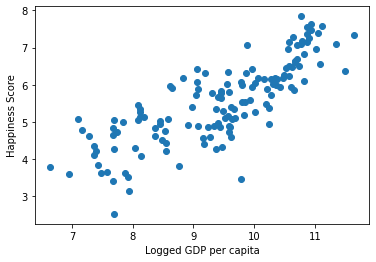

In [102]:
plt.scatter(df['Logged GDP per capita'], df['Ladder score'])
plt.xlabel('Logged GDP per capita')
plt.ylabel('Happiness Score')

There seems to be a positive correlation between happiness and GDP per capita

Text(0, 0.5, 'Happiness Score')

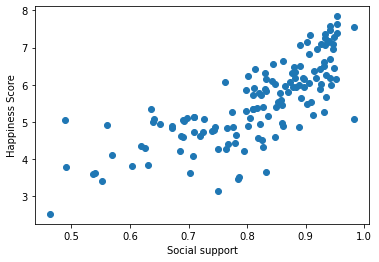

In [103]:
plt.scatter(df['Social support'], df['Ladder score'])
plt.xlabel('Social support')
plt.ylabel('Happiness Score')

Same with social support but the relationship seems a bit nonlinear

Text(0, 0.5, 'Happiness Score')

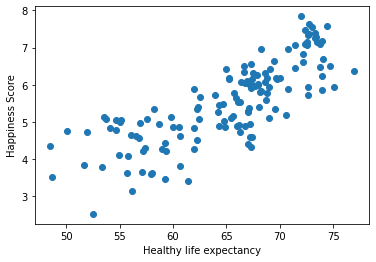

In [115]:
plt.scatter(df['Healthy life expectancy'], df['Ladder score'])
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness Score')

There seems to be a positive correlation between happiness and life expectancy

Text(0, 0.5, 'Happiness Score')

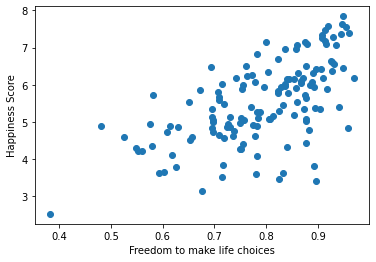

In [117]:
plt.scatter(df['Freedom to make life choices'], df['Ladder score'])
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

There seems to be weak positive correlation between happiness and Freedom 

Text(0, 0.5, 'Happiness Score')

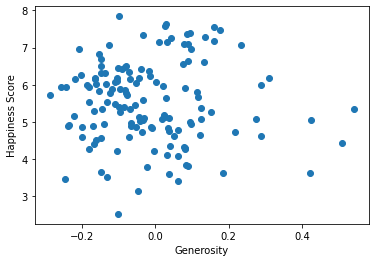

In [118]:
plt.scatter(df['Generosity'], df['Ladder score'])
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

Very weak relationship here

Text(0, 0.5, 'Happiness Score')

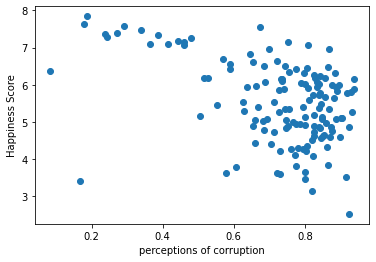

In [119]:
plt.scatter(df['Perceptions of corruption'], df['Ladder score'])
plt.xlabel('perceptions of corruption')
plt.ylabel('Happiness Score')

There seems to be a negative correlation between corruption and happiness but there are some outliers we should investigate

In [151]:
df.loc[(df['Ladder score'] < 4) & (df['Perceptions of corruption'] <0.2),['Ladder score', 'Perceptions of corruption']]

,Ladder score,Perceptions of corruption
137,3.415,0.167


The outlier here is rwanda where the happiness score is very low even though there is a low perception of corruption. This means there is something else that is driving unhappiness in Rwanda.

Text(0, 0.5, 'Happiness Score')

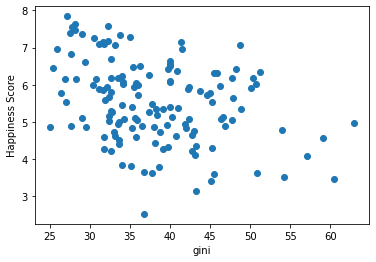

In [120]:
plt.scatter(df['gini'], df['Ladder score'])
plt.xlabel('gini')
plt.ylabel('Happiness Score')

Loose negative correlation

Text(0, 0.5, 'Happiness Score')

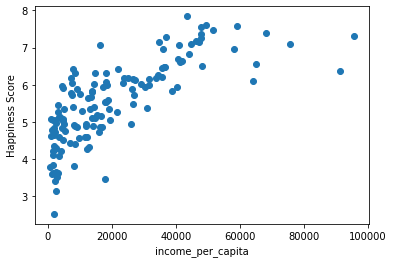

In [121]:
plt.scatter(df['income_per_capita'], df['Ladder score'])
plt.xlabel('income_per_capita')
plt.ylabel('Happiness Score')

We might have a scaling issue here but there appears to be a positive correlation between income per capita and happiness up to a certain extent.

Text(0, 0.5, 'Happiness Score')

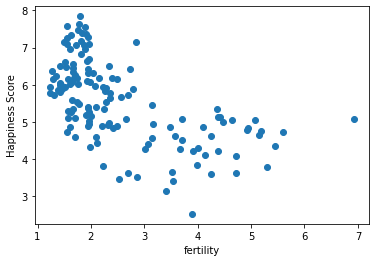

In [123]:
plt.scatter(df['fertility'], df['Ladder score'])
plt.xlabel('fertility')
plt.ylabel('Happiness Score')

Negative correlation between happiness and fertility. Lower birth rates lead to higher happiness

Text(0, 0.5, 'Happiness Score')

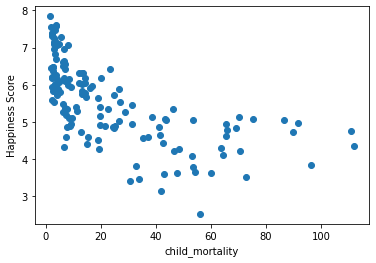

In [125]:
plt.scatter(df['child_mortality'], df['Ladder score'])
plt.xlabel('child_mortality')
plt.ylabel('Happiness Score')

Negative correlation here. But there may be lurking variables as a high child mortality rate could be related to low GDP per capita and lower life expectancies.

Text(0, 0.5, 'Happiness Score')

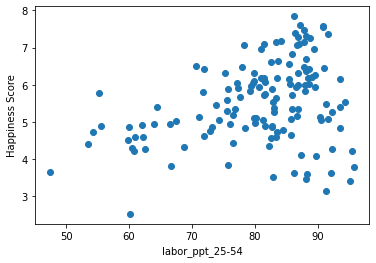

In [126]:
plt.scatter(df['labor_ppt_25-54'], df['Ladder score'])
plt.xlabel('labor_ppt_25-54')
plt.ylabel('Happiness Score')

Correlation appears to be very low

## 3.6 Histogram of continuous variables <a id='3.6_histograms'></a>

array([[<AxesSubplot:title={'center':'Ladder score'}>,
        <AxesSubplot:title={'center':'Logged GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'gini'}>,
        <AxesSubplot:title={'center':'income_per_capita'}>],
       [<AxesSubplot:title={'center':'fertility'}>,
        <AxesSubplot:title={'center':'child_mortality'}>,
        <AxesSubplot:title={'center':'labor_ppt_25-54'}>]], dtype=object)

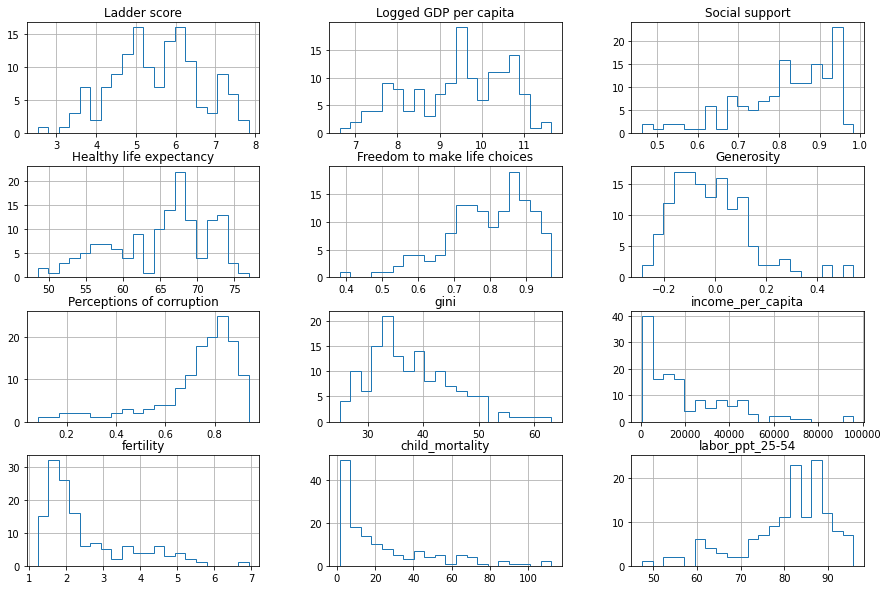

In [133]:
df.hist(figsize=(15,10), bins=20, histtype='step')

Ladder score appears to be normally distribured. Same with GDP per capita. Other variables appear to be either positively or negatively skewed. We may need to normalize and address skew in these variables.

## 3.7 Interactions between all variables <a id='3.7_interactions'></a>

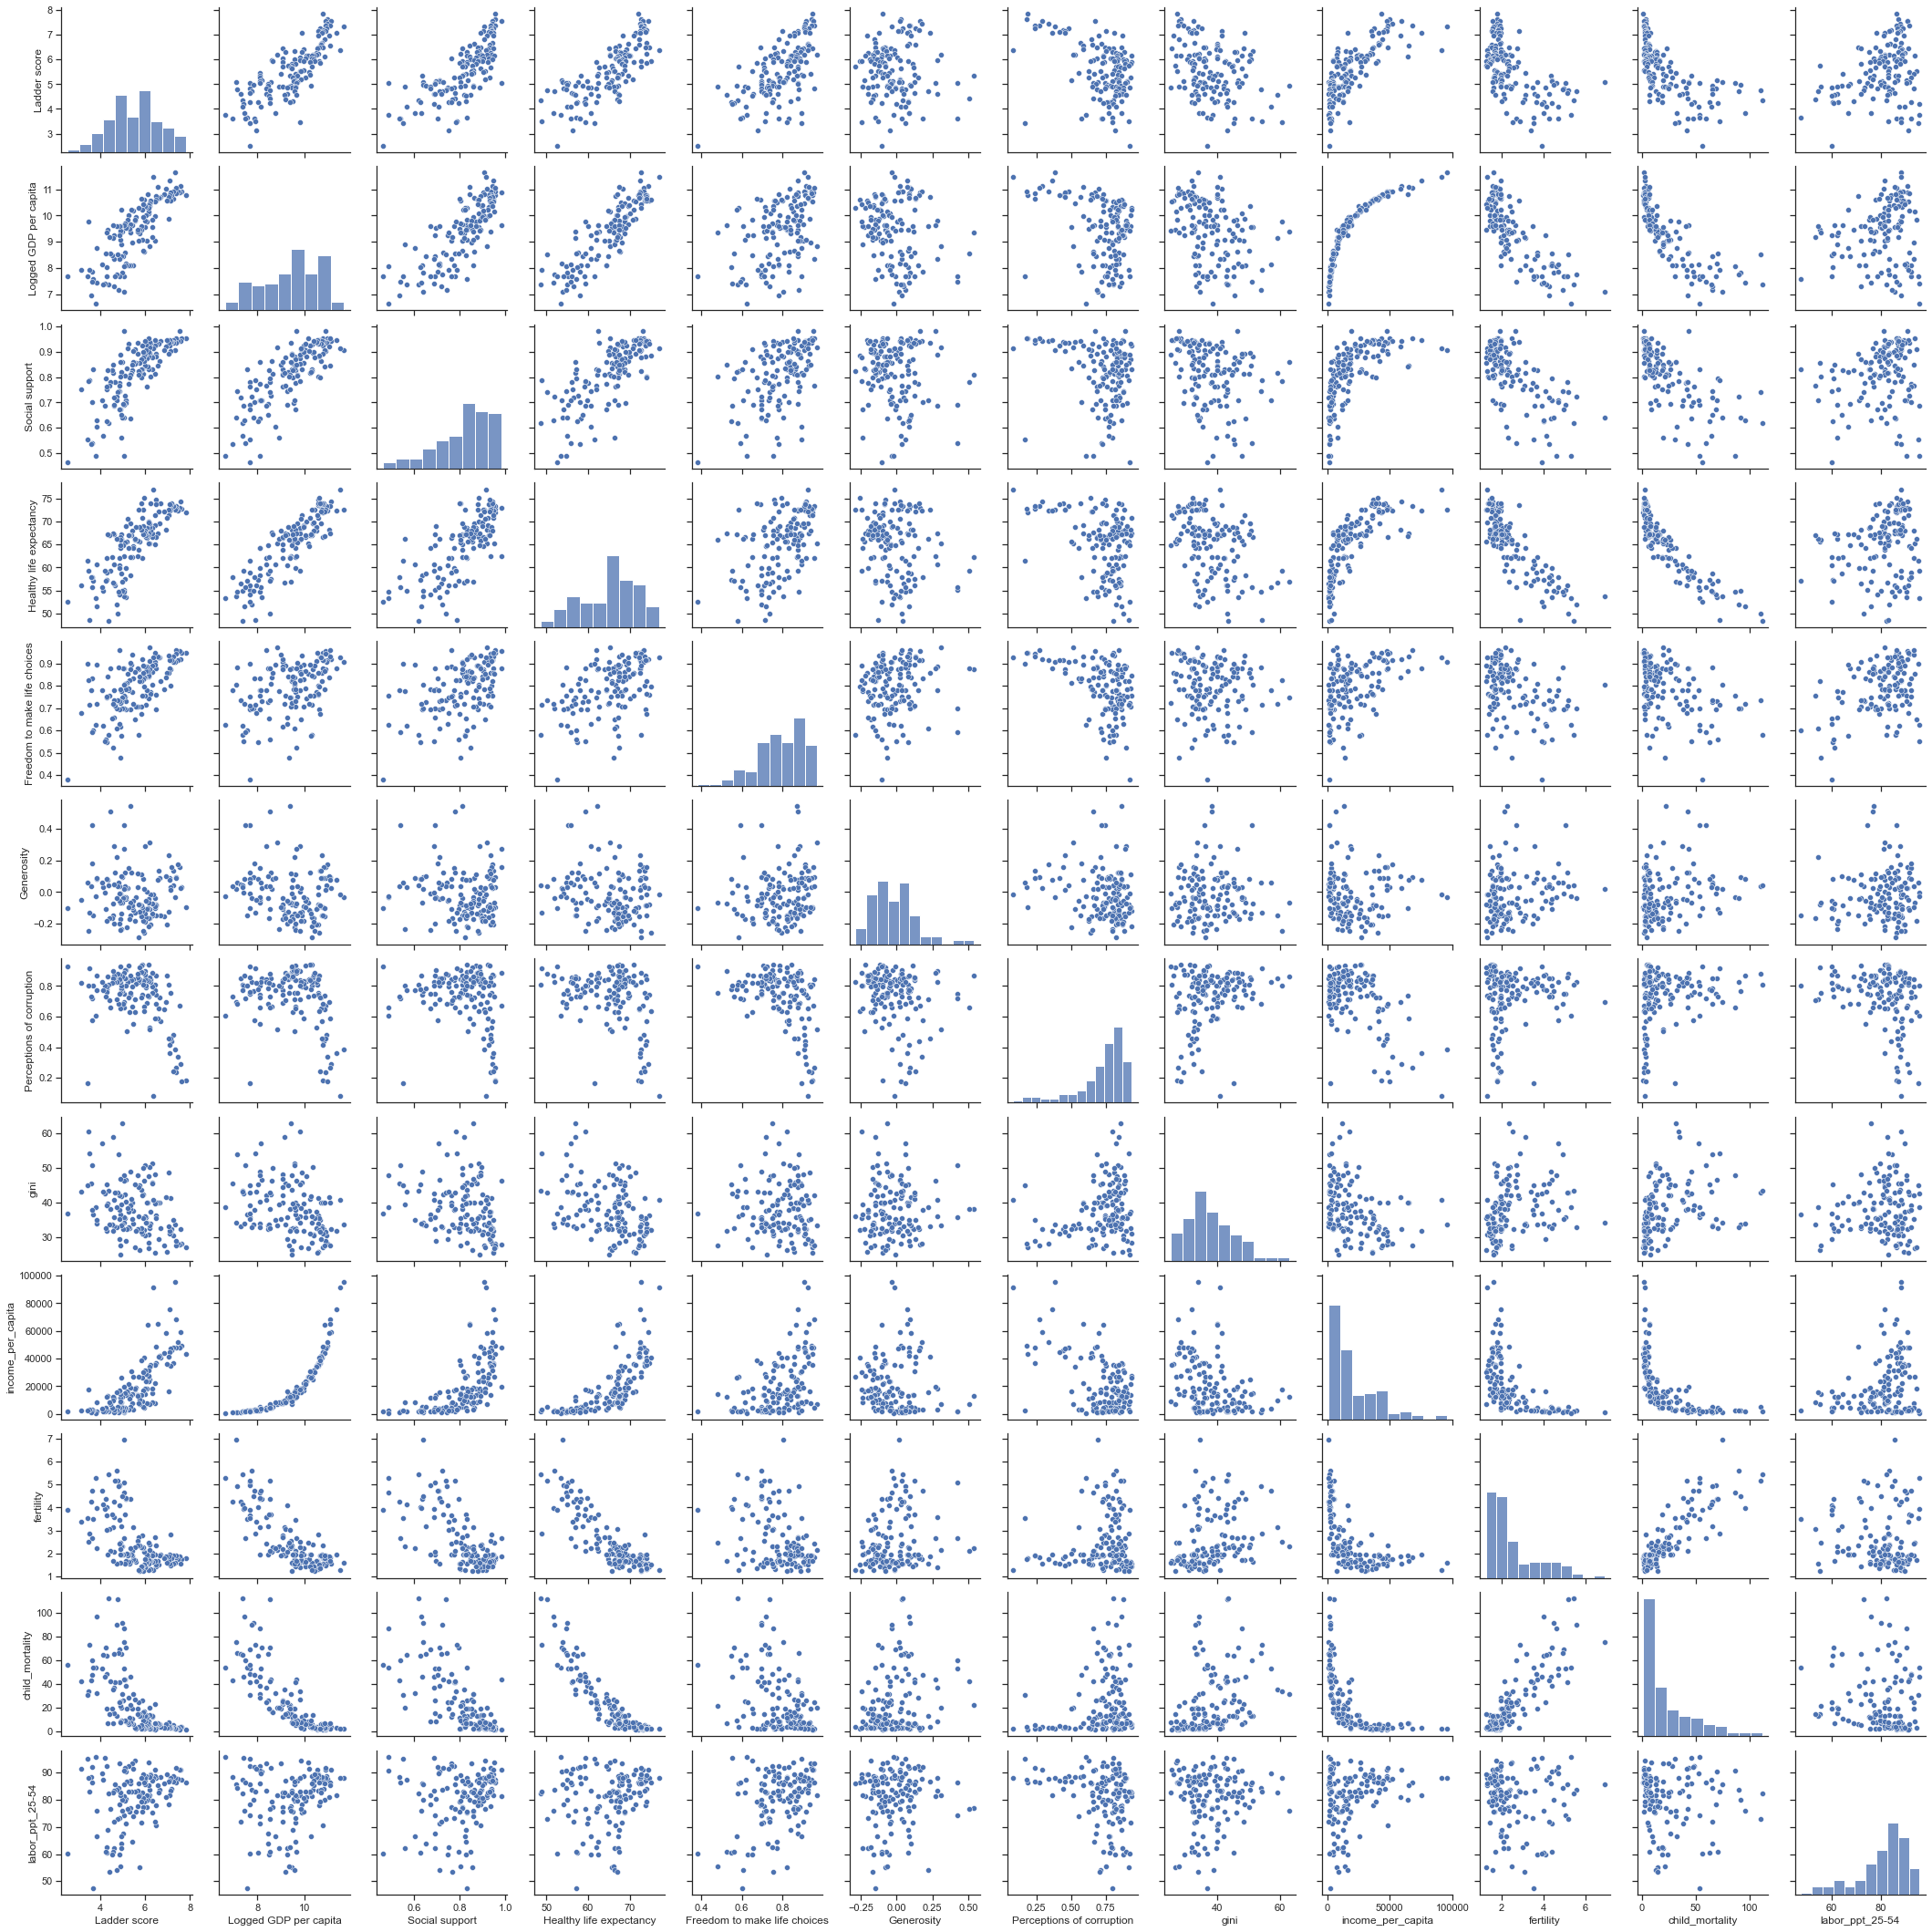

In [140]:
sns.set_theme(style = 'ticks')
sns.pairplot(df)

[Text(0.5, 0, 'Ladder score'),
 Text(1.5, 0, 'Logged GDP per capita'),
 Text(2.5, 0, 'Social support'),
 Text(3.5, 0, 'Healthy life expectancy'),
 Text(4.5, 0, 'Freedom to make life choices'),
 Text(5.5, 0, 'Generosity'),
 Text(6.5, 0, 'Perceptions of corruption'),
 Text(7.5, 0, 'gini'),
 Text(8.5, 0, 'income_per_capita'),
 Text(9.5, 0, 'fertility'),
 Text(10.5, 0, 'child_mortality'),
 Text(11.5, 0, 'labor_ppt_25-54')]

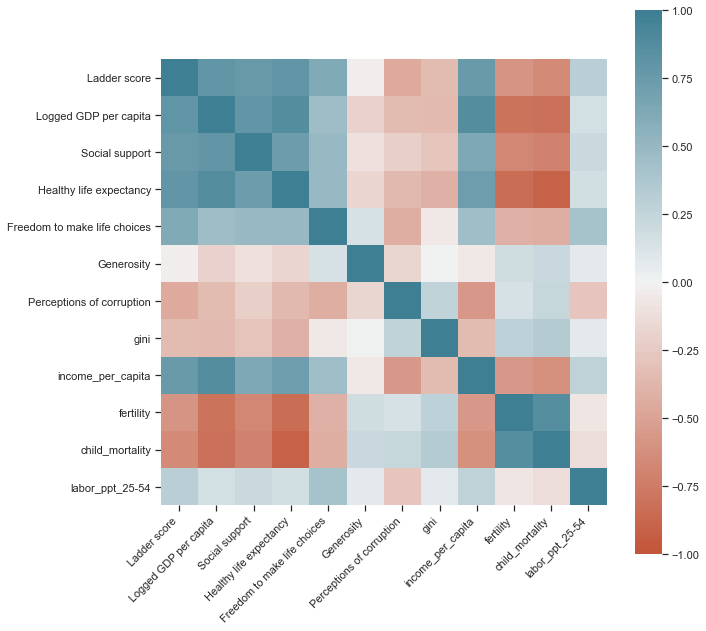

In [160]:
fig = plt.subplots(figsize=(10,10))

ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [147]:
df.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility,child_mortality,labor_ppt_25-54
Ladder score,1.000000,0.802298,0.760790,0.792815,0.615803,-0.029256,-0.451679,-0.343349,0.751791,-0.584491,-0.652830,0.310735
Logged GDP per capita,0.802298,1.000000,0.795511,0.872704,0.463634,-0.202013,-0.336240,-0.351761,0.868843,-0.803244,-0.819044,0.167091
Social support,0.760790,0.795511,1.000000,0.733204,0.494728,-0.116703,-0.220520,-0.290517,0.632114,-0.672962,-0.706762,0.212336
Healthy life expectancy,0.792815,0.872704,0.733204,1.000000,0.488735,-0.187414,-0.366991,-0.399728,0.726156,-0.839391,-0.906771,0.177905
Freedom to make life choices,0.615803,0.463634,0.494728,0.488735,1.000000,0.144550,-0.436879,-0.061053,0.448962,-0.399281,-0.430189,0.418137
Generosity,-0.029256,-0.202013,-0.116703,-0.187414,0.144550,1.000000,-0.177694,0.000022,-0.052758,0.185506,0.226200,0.074796
Perceptions of corruption,-0.451679,-0.336240,-0.220520,-0.366991,-0.436879,-0.177694,1.000000,0.260197,-0.560645,0.143747,0.228927,-0.283435
gini,-0.343349,-0.351761,-0.290517,-0.399728,-0.061053,0.000022,0.260197,1.000000,-0.348007,0.284869,0.332817,0.071909
income_per_capita,0.751791,0.868843,0.632114,0.726156,0.448962,-0.052758,-0.560645,-0.348007,1.000000,-0.568657,-0.615030,0.274028
fertility,-0.584491,-0.803244,-0.672962,-0.839391,-0.399281,0.185506,0.143747,0.284869,-0.568657,1.000000,0.865836,-0.080868


**Notes:**

   1. Logged GDP and income per capita have a non linear relationship. We can probably drop income per capita and use Logged GDP and income per capita instead.
   2. Logged GDP and healthly life expectancy are postively correlated
   3. Logged GDP is strongly positively correlated with Social support, Healthy life expectancy and strongly negatively correlated with fertility and child_mortality. When modeling perhaps we can test to see if removing some of these correlated variables can improve accuracy
   4. Gini metric is not very correlated with other variables. This might be a good one to include in modeling
   5. Freedom appears to be moderately correlated with several varabies but nothing oer 0.7.
   6. Perception of corruption is not strongly correlated with any variables. absolute value ofcorrelations all under 0.6
   7. labor participation also has low correlations with other variables so it could be a good one to include in modeling. 
   8. Generosity has a low correlation with other variables but also the target variable. This variable might not have a lot of predictive power.